# Machine Learning Models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
df_train = pd.read_csv("dataset/output/train.csv")
df_test = pd.read_csv("dataset/output/test.csv")

In [3]:
# split into X_train, y_train, X_test, y_test
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

# normalize data
X_train = normalize(X_train)
X_test = normalize(X_test)

In [4]:
# helper function to draw learning curve in sns plot
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ylim=None,
    cv=None,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    plt.figure(figsize=(5, 3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-",
             color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.show()

## Support Vector Machine (SVM)


Accuracy:  0.6636622390891841
Confusion Matrix: 
 [[1323   42]
 [ 667   76]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.97      0.79      1365
           1       0.64      0.10      0.18       743

    accuracy                           0.66      2108
   macro avg       0.65      0.54      0.48      2108
weighted avg       0.66      0.66      0.57      2108



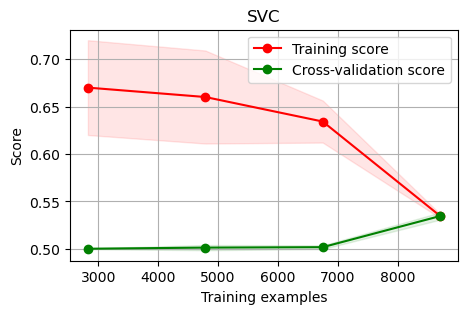

In [6]:
model = SVC(kernel="rbf", random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

plot_learning_curve(model, "SVC", X_train, y_train, cv=5)

## Decision Tree


Accuracy:  0.39990512333965844
Confusion Matrix: 
 [[650 715]
 [550 193]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.48      0.51      1365
           1       0.21      0.26      0.23       743

    accuracy                           0.40      2108
   macro avg       0.38      0.37      0.37      2108
weighted avg       0.43      0.40      0.41      2108



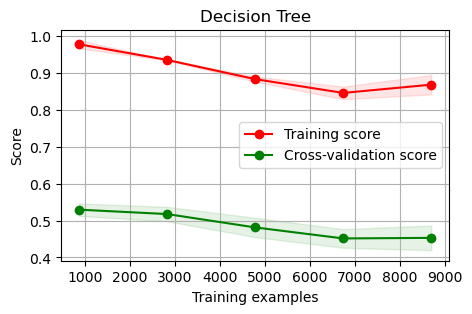

In [7]:
model = DecisionTreeClassifier(
    criterion="entropy", splitter="best", random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

plot_learning_curve(model, "Decision Tree", X_train, y_train, cv=5)

## Logistic Regression


Accuracy: 0.5996204933586338
Confusion Matrix: 
 [[1029  336]
 [ 508  235]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      1365
           1       0.41      0.32      0.36       743

    accuracy                           0.60      2108
   macro avg       0.54      0.54      0.53      2108
weighted avg       0.58      0.60      0.59      2108



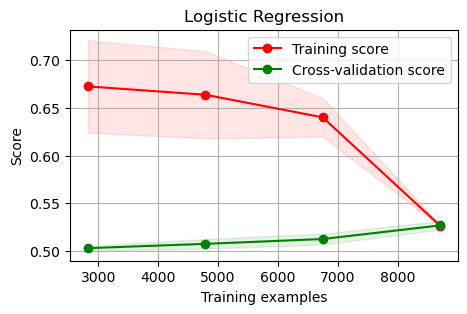

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Logistic Regression", X_train, y_train, cv=5)

## Random Forest


Accuracy: 0.6826375711574952
Confusion Matrix: 
 [[1208  157]
 [ 512  231]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78      1365
           1       0.60      0.31      0.41       743

    accuracy                           0.68      2108
   macro avg       0.65      0.60      0.60      2108
weighted avg       0.66      0.68      0.65      2108



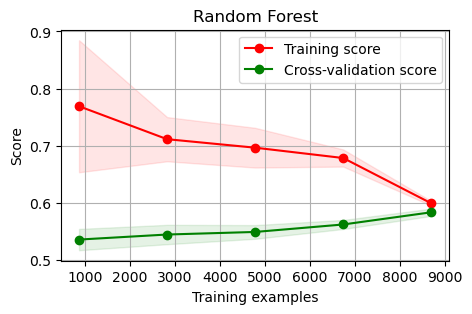

In [9]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Random Forest", X_train, y_train, cv=5)